In [1]:
# Source: https://github.com/anjal05/KNN/blob/master/10.2%20KNN%20Example(Diabetes).ipynb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv('pima-india-diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
# Get info on data set ie. column names, rows, if null, data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Get Column names in an array & view
a=df.columns
a

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# Get the rows & column count
df.shape

(768, 9)

In [7]:
# Look at correlations of the factors
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


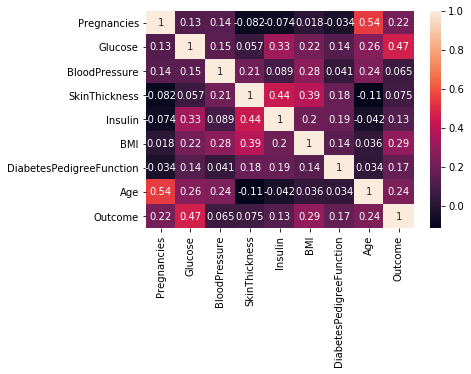

In [8]:
# Visualise the above corelations in a heatmap
sns.heatmap(df.corr(), annot =True)

In [9]:
# Reconfirm if any factor (column) has null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

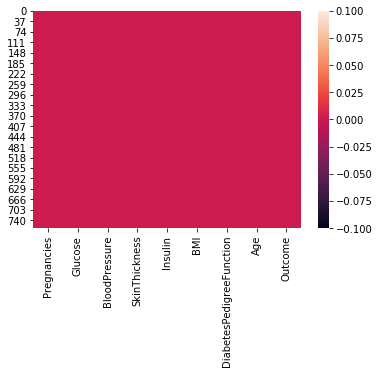

In [10]:
# As can be see above, there are no null values in dataset
# However visualise to reconfirm - just practicing:)
sns.heatmap(df.isnull())

In [11]:
# Get descriptive statistics for data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


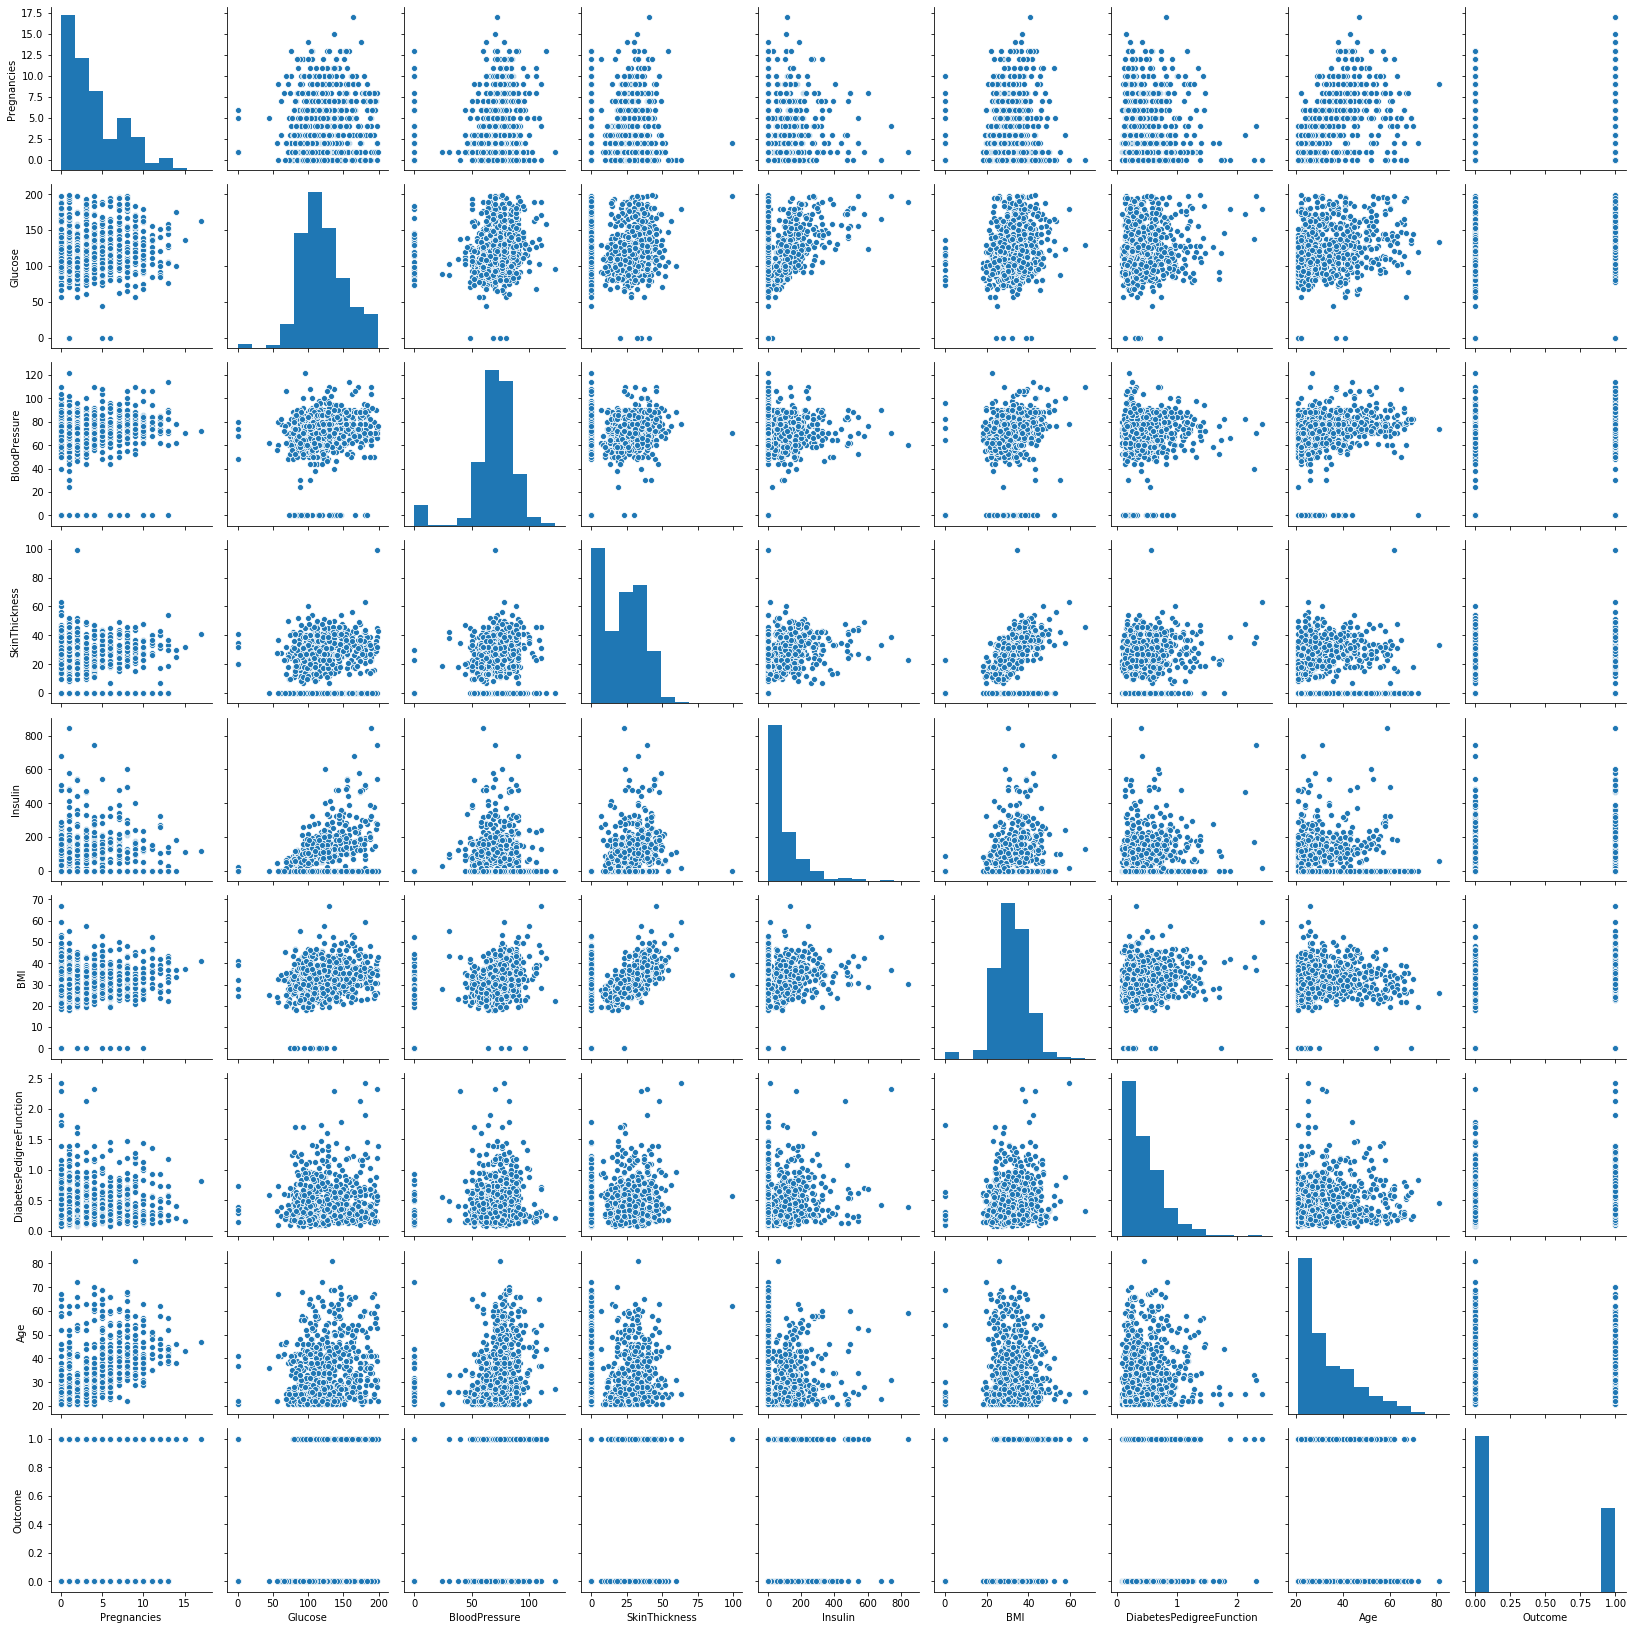

In [12]:
# Visualise relationship between any pair of variables using pairplot
# This step takes a few minutes - pls wait patiently - it is an excellent visualisation tool!!!
sns.pairplot(df)

In [14]:
# Explore target variable binary class distribution
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Text(0.5, 1.0, 'Target Variable Diabetes Yes =1 & No = 0')

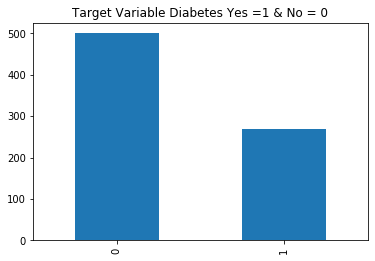

In [16]:
# Visualise as a histogram
df['Outcome'].value_counts().plot.bar().set_title('Target Variable Diabetes Yes =1 & No = 0')

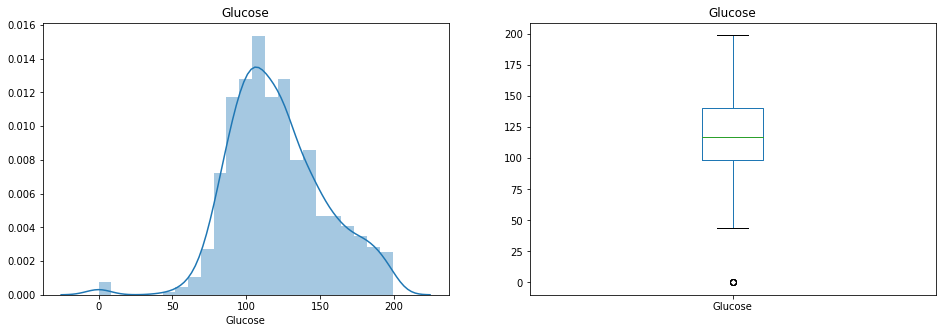

In [18]:
# Explore all other factors (input variables) using univariate visualisation tools
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df['Glucose']).set_title('Glucose');
plt.subplot(122)
df['Glucose'].plot.box(figsize=(16,5)).set_title('Glucose')
plt.show()

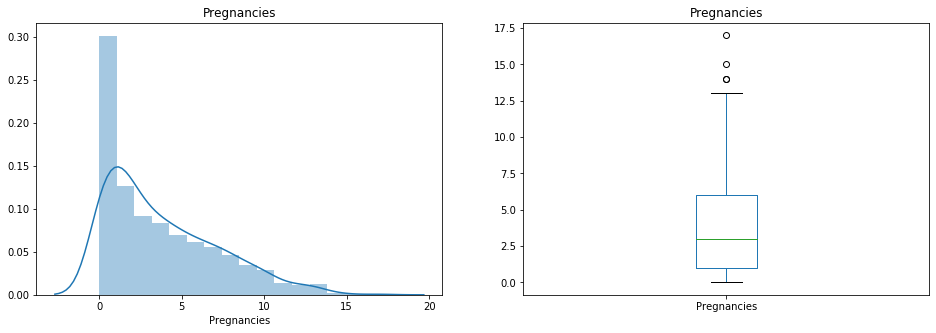

In [23]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(df['Pregnancies']).set_title('Pregnancies');
plt.subplot(122)
df['Pregnancies'].plot.box(figsize=(16,5)).set_title('Pregnancies')
plt.show()

Text(0.5, 1.0, 'Pregnancies vs. Outcome')

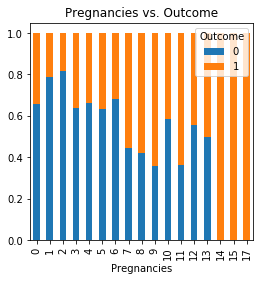

In [25]:
# Plot multivariate graph of Pregnancies with Diabetes outcome
Pregnancies=pd.crosstab(df['Pregnancies'],df['Outcome'])
Pregnancies.div(Pregnancies.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4)).set_title('Pregnancies vs. Outcome')

### Start fitting 

In [27]:
# Create Train, Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [28]:
# Start K Nearest Neighbors Classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_range= range(1,20)
train_score_list= []
test_score_list= []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred_train = knn.predict(x_train)
    y_pred_test = knn.predict(x_test)
    train_score_list.append(accuracy_score(y_train, y_pred_train))
    test_score_list.append(accuracy_score(y_test, y_pred_test))

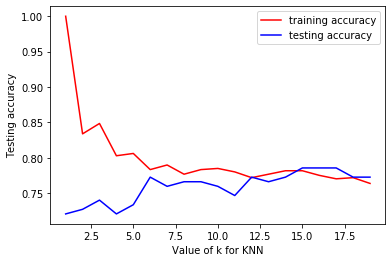

In [29]:
# Plot Training accuracy improvement on train & test values of K between 1 & 20
plt.plot(k_range,train_score_list,color='r', label="training accuracy")
plt.plot(k_range,test_score_list,color='b', label="testing accuracy")
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing accuracy')
plt.legend()

#### From above it seems like with K value of 16 we get good fitting

In [34]:
# Now train KNN model with K=16
knn = KNeighborsClassifier(n_neighbors = 16)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=16)

In [35]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       401
           1       0.76      0.52      0.62       213

    accuracy                           0.78       614
   macro avg       0.77      0.72      0.73       614
weighted avg       0.77      0.78      0.76       614

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        99
           1       0.81      0.53      0.64        55

    accuracy                           0.79       154
   macro avg       0.79      0.73      0.74       154
weighted avg       0.79      0.79      0.77       154



In [37]:
#Cross validate
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(KNeighborsClassifier(n_neighbors= 16), x, y, cv =5)
cv_score

array([0.73376623, 0.7012987 , 0.76623377, 0.79738562, 0.71895425])

In [38]:
# Get mean CV score from above
cv_score.mean()

0.7435277141159494

In [39]:
from sklearn.model_selection import GridSearchCV
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

In [40]:
knn_gscv.fit(x, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [41]:
knn_gscv.best_params_

{'n_neighbors': 14}

In [42]:
knn_gscv.best_score_

0.7578558696205755